The last column of ‘spambase.data’ denotes whether the e-mail was considered spam (1) or not (0)

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import re

In [2]:
# Preparing dataset
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report','word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'classified']
df = pd.read_csv('spambase_data', names=cols, header=None)
X = df.iloc[:, :-1]
y = df.classified

In [3]:
# Removing special characters from column names, else it creates a problem using various regression models
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [4]:
# Going through data tables 
print('Data Table \n')
display(X)

print('\n\nTags Table')
display(y)

Data Table 



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78




Tags Table


0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: classified, Length: 4601, dtype: int64

In [6]:
# Counting number of Spam/Non-Spam samples in the database
df.groupby('classified').count()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
classified,,,,,,,,,,,,,,,,,,,,,
0,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788,...,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788
1,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,...,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813


# Modelling

In [7]:
# Splitting the data into training and testing subsets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [8]:
# Using MultinomialNB Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

predicted = mnb.predict(X_test)

score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 80.95582910934105


In [9]:
# Using XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=120, leanring_rate=0.075)
xgb.fit(X_train, y_train)
#xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

predicted1 = xgb.predict(X_test)

[13:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "leanring_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




# Checking accuracy of model


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       822
           1       0.77      0.75      0.76       559

    accuracy                           0.81      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.81      0.81      0.81      1381



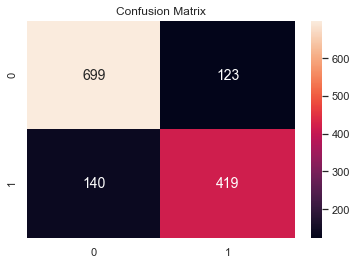

In [10]:
# Creating a confusion matrix and Classification Report. Output is in order of: True Positive, False Positive, False Negative and True Negative
import seaborn as sn
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

cm1 = cm(y_test, predicted, labels=[0, 1])
df_cm = pd.DataFrame(cm1, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')

print('\nClassification Report: \n', cr(y_test, predicted))

Accuracy Score on XGBoost: 
 94.6415640839971

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       822
           1       0.95      0.92      0.93       559

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.95      0.95      0.95      1381



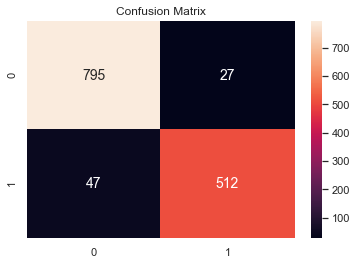

In [11]:
# Predicting when False Outcomes are Allowed for probabilities >0.5
score1 = accuracy_score(y_test, (predicted1 > 0.5))
print('Accuracy Score on XGBoost: \n', (100*score1))
cm2 = cm(y_test, predicted1 > 0.5, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', cr(y_test, (predicted1 > 0.5)))

Accuracy Score on XGBoost: 
 87.97972483707458

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       822
           1       0.99      0.71      0.83       559

    accuracy                           0.88      1381
   macro avg       0.91      0.85      0.87      1381
weighted avg       0.90      0.88      0.88      1381



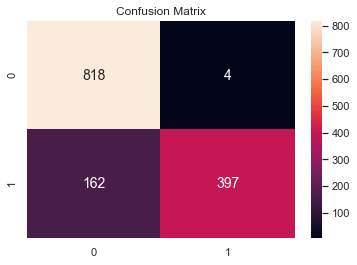

In [12]:
# Predicting when False Outcomes are Restricted for probabilities <0.9
score1 = accuracy_score(y_test, (predicted1 > 0.9))
print('Accuracy Score on XGBoost: \n', (100*score1))
cm2 = cm(y_test, predicted1 > 0.9, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', cr(y_test, (predicted1 > 0.9)))